In [1]:
import numpy as np
import pandas as pd
from datetime import date
from dateutil.rrule import rrule, MONTHLY, YEARLY
from dateutil.relativedelta import relativedelta
from typing import List
import re
import os

## Data Preprocessing

Строки с 7 по 26 я решил убрать, так как не понял их смысл. Столбцы до 8 тоже убраны, так как в них не содержится информации. Данные по CRBO в папке oil_gas_train есть, одна в oil_gas_train_test их нет вообще, поэтому по этой компании мы данные не собираем.
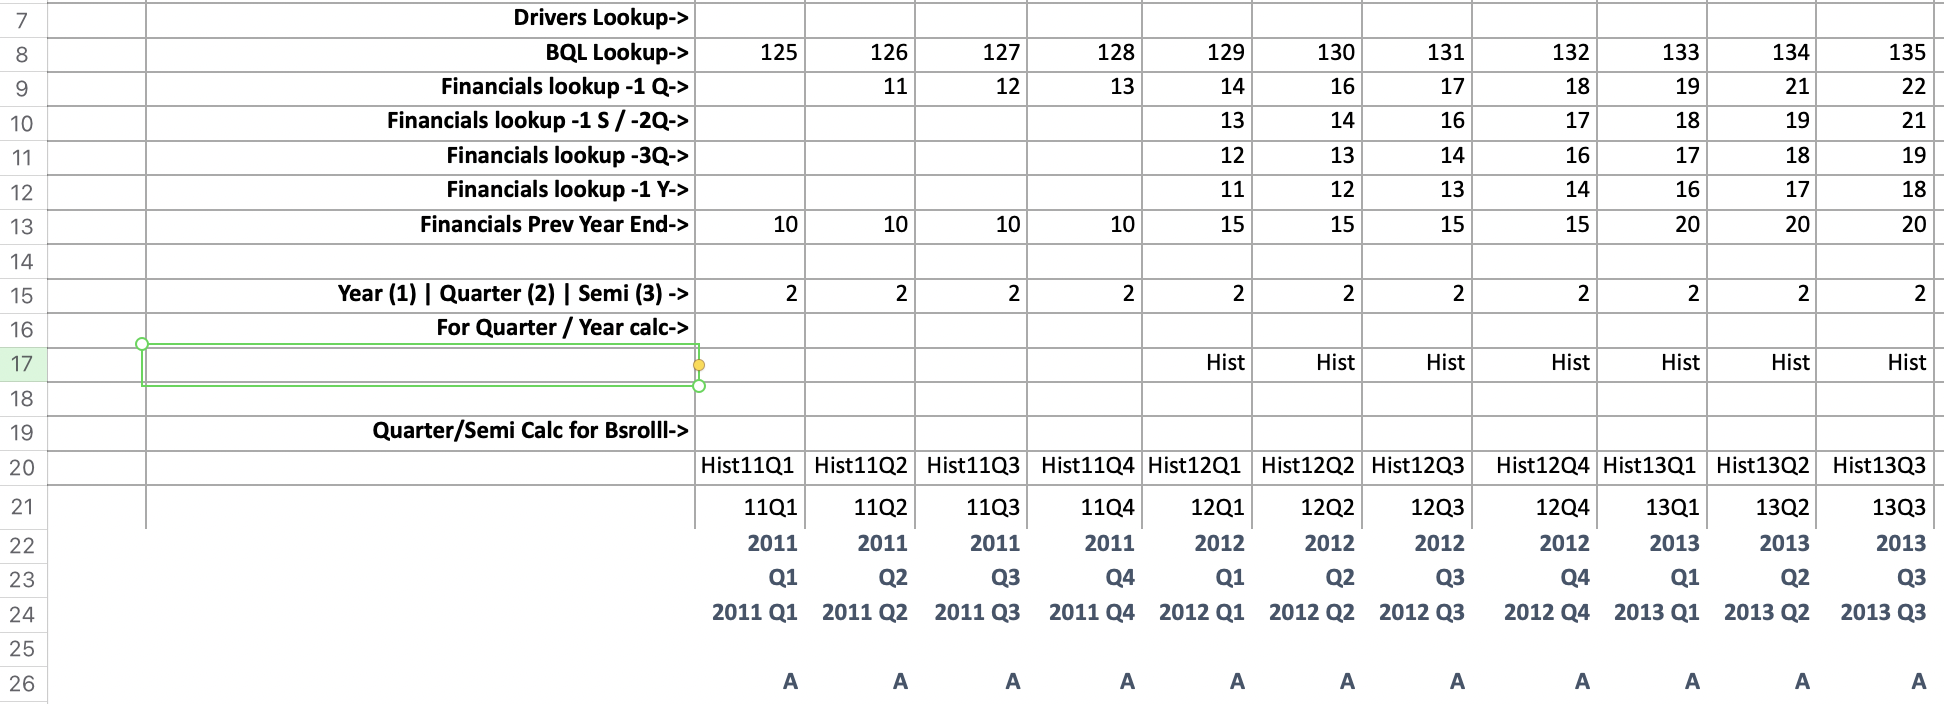

Что касается отбора признаков, то я старался отобрать их таким образом, чтобы среди них не было признаков, которые выводятся из остальных. 

In [2]:
def preprocess_data(path: str, features_to_parse: List[str], indices: List[date]) -> pd.DataFrame:
    df = pd.read_excel(path)
#     if 'CRBO' in path:
#         df = pd.concat([df.iloc[27:, 8], df.iloc[27:, 13:]], axis=1)
#     else:
#         df = df.iloc[27:, 8:]
    df = df.iloc[27:, 8:]
    df = df[df.iloc[:, 0].isin(features_to_parse)]
    
    df = df.transpose()
    new_header = df.iloc[0]
    df = df[1:]
    df.columns = new_header
    df.columns.name = 'features'
    df = df.loc[:,~df.columns.duplicated()]
    
    df['date'] = pd.to_datetime(dates)
    df.set_index('date', inplace=True)
    
    df['Company'] = re.findall(r'/.*\.', path)[0][1:-1]
    
    return df

In [3]:
directory_path = 'oil_gas_train_test'

dates = [date(2011, 3, 31) + relativedelta(months=i) for i in range(0, 124, 3)]

features_to_parse = ['Revenue', 'Gross Profit', 'Operating Income', 'Pretax Income',
                    'Income (Loss) from Cont Ops', 'Net Income', 'Net Income Avail to Common',
                    'Diluted EPS', 'EBITDA', 'Total Equity',
                    'Cash from Operations', 'Cash from Investing Activities', 'Cash from Financing Activities']

In [4]:
dfs = []
for path in os.listdir(directory_path):
    if 'CRBO' in path or 'DS_Store' in path:
        continue
    df = preprocess_data(os.path.join(directory_path, path), features_to_parse, indices=dates)
    dfs.append(df)
    
df = pd.concat(dfs)
df.to_csv('data.csv')